In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn import *

%matplotlib inline

/Users/abulbasar/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/abulbasar/anaconda3/lib/python3.6/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)
/Users/abulbasar/anaconda3/lib/python3.6/site-packages/sklearn/learning_curve.py:22: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the functions are moved. This module will be rem

In [18]:
df_train = pd.read_csv("/data/MNIST/mnist_train.csv", header = None)

In [19]:
df_train.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
df_train.shape

(60000, 785)

In [21]:
28 * 28

784

In [25]:
X_train = df_train.iloc[:, 1:].values
y_train = df_train.iloc[:, 0].values

In [26]:
img = X_train[0].reshape(28, 28)
img.shape

(28, 28)

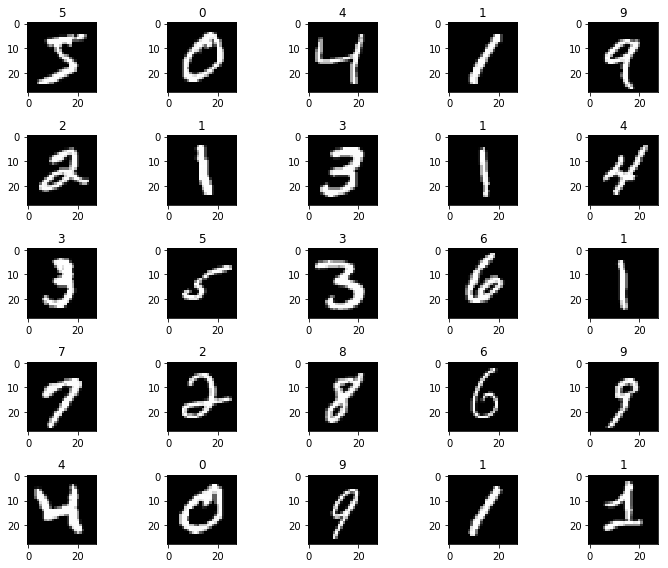

In [36]:
fig, axes = plt.subplots(5,5, figsize=(10, 8))
for i, ax in enumerate(fig.axes):
    ax.imshow(X_train[i].reshape(28, 28), cmap="gray")
    ax.set_title(y_train[i])
    
plt.tight_layout()

(array([38847859.,   571880.,   514157.,   438029.,   446644.,   503214.,
          469607.,   518723.,   611860.,  4118027.]),
 array([  0. ,  25.5,  51. ,  76.5, 102. , 127.5, 153. , 178.5, 204. ,
        229.5, 255. ]),
 <a list of 10 Patch objects>)

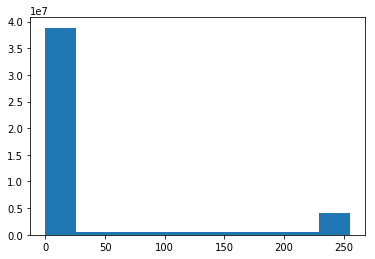

In [37]:
plt.hist(X_train.flatten())

In [40]:
np.max(X_train.flatten())

255

In [41]:
X_train = X_train/255

In [42]:
df_test = pd.read_csv("/data/MNIST/mnist_test.csv", header = None)
X_test = df_test.iloc[:, 1:].values/255
y_test = df_test.iloc[:, 0].values

In [45]:
%%time
est = linear_model.SGDClassifier(tol=1e-5, eta0 = 0.15,  
                                 learning_rate = "invscaling", 
                                 alpha = 0.01, max_iter= 100)
est.fit(X_train, y_train)
#print("accuracy", est.score(X_test_std, y_test), "iterations:", est.n_iter_)

CPU times: user 9.33 s, sys: 198 ms, total: 9.53 s
Wall time: 9.61 s


In [46]:
est.score(X_test, y_test)

0.9081

In [47]:
y_test_pred = est.predict(X_test)

In [48]:
wrong_prediction = y_test != y_test_pred

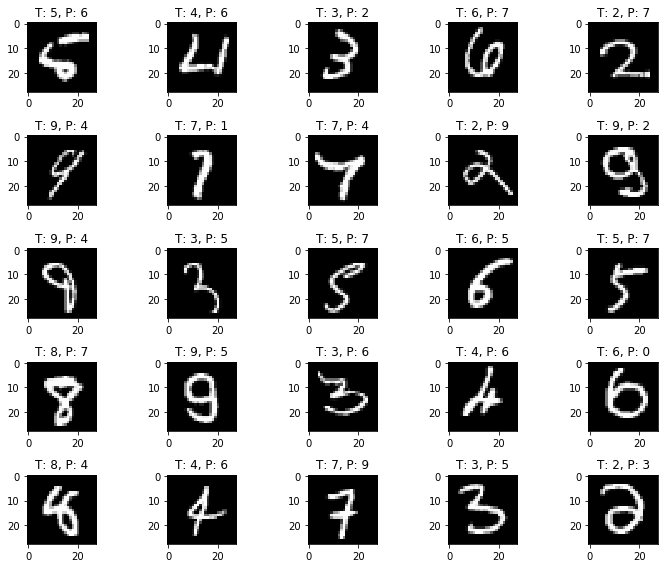

In [52]:
fig, axes = plt.subplots(5,5, figsize=(10, 8))
for i, ax in enumerate(fig.axes):
    ax.imshow(X_test[wrong_prediction][i].reshape(28, 28), cmap="gray")
    ax.set_title("T: %d, P: %d" 
            % (y_test[wrong_prediction][i]
                   , y_test_pred[wrong_prediction][i]))
    
plt.tight_layout()

In [53]:
scaler = preprocessing.StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

In [54]:
pca = decomposition.PCA()
pca.fit(X_train_std)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

Text(0,0.5,'Explained variance ratio')

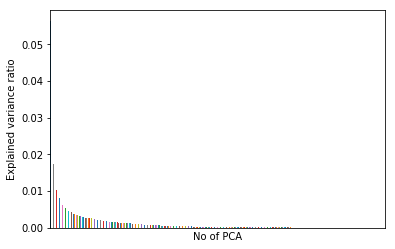

In [58]:
pd.Series(pca.explained_variance_ratio_).plot.bar()
plt.xticks([])
plt.xlabel("No of PCA")
plt.ylabel("Explained variance ratio")

In [59]:
len(pd.Series(pca.explained_variance_ratio_))

784

In [62]:
# To determine the reduced dimension, we try to retain 99% of total variance 
cum_variance = pd.Series(np.cumsum(pca.explained_variance_ratio_))

In [64]:
cum_variance[cum_variance>0.99][:5]

542    0.990088
543    0.990183
544    0.990276
545    0.990369
546    0.990462
dtype: float64

We can see that with 542 PCA values, we could retain 99% of the variance

In [65]:
pca = decomposition.PCA(n_components=542)
pca.fit(X_train_std)

PCA(copy=True, iterated_power='auto', n_components=542, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [66]:
X_train_pca = pca.transform(X_train_std)
X_test_pca = pca.transform(X_test_std)

In [68]:
%%time
est = linear_model.SGDClassifier(tol=1e-5, eta0 = 0.15,  
                                 learning_rate = "invscaling", 
                                 alpha = 0.01, max_iter= 100)
est.fit(X_train_pca, y_train)
print(est.score(X_test_pca, y_test))

0.9189
CPU times: user 5.75 s, sys: 13.1 ms, total: 5.76 s
Wall time: 5.79 s


Observations 
- training time is reduced
- accuracy is comparable with the full dimensional data